In [10]:
import pandas as pd

data = pd.read_csv("./data/train.csv", index_col='id')
print(data.shape)
data.head()

(61878, 94)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
4,1,0,0,1,6,1,5,0,0,1,...,0,1,2,0,0,0,0,0,0,Class_1
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


## Preprocessing

In [11]:
label_name = "target"
label_name

'target'

In [12]:
feature_names = data.columns.difference([label_name])

print(len(feature_names))
X = data[feature_names]

print(X.shape)
X.head()

93
(61878, 93)


,feat_1,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_9,feat_90,feat_91,feat_92,feat_93
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,0,0,0,0,2,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,1,0,0,1,1,0,...,0,1,2,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,4,0,...,1,0,0,0,0,0,1,0,0,0


## Decision Tree

In [13]:
y = data[label_name]

In [14]:
print(y.unique())

['Class_1' 'Class_2' 'Class_3' 'Class_4' 'Class_5' 'Class_6' 'Class_7'
 'Class_8' 'Class_9']


In [15]:
print(y.shape)
y.head()

(61878,)


id
1    Class_1
2    Class_1
3    Class_1
4    Class_1
5    Class_1
Name: target, dtype: object

In [16]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [17]:
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [18]:
y_predict = model.predict(X)

print(y_predict.shape)
y_predict

(61878,)


array(['Class_1', 'Class_1', 'Class_1', ..., 'Class_9', 'Class_9',
       'Class_9'], dtype=object)

In [20]:
score = (y_predict == y).mean()

print(f"Score = {score:.6f}")

Score = 1.000000


In [22]:
from sklearn.metrics import accuracy_score

score = accuracy_score( y, y_predict)

print(f"Score = {score:.6f}")

Score = 1.000000


## Hold-out Validation

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(43314, 93) (43314,)
(18564, 93) (18564,)


In [26]:
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [27]:
train_score = accuracy_score(y_train, y_train_predict)
test_score = accuracy_score(y_test, y_test_predict)

print(f"Accuracy(train) = {train_score:.6f}")
print(f"Accuracy(test) = {test_score:.6f}")

Accuracy(train) = 1.000000
Accuracy(test) = 0.709869


## HyperParameter

In [28]:
model = DecisionTreeClassifier(max_depth=20, random_state =42)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [29]:
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [30]:
train_score = accuracy_score(y_train, y_train_predict)
test_score = accuracy_score(y_test, y_test_predict)

print(f"Accuracy(train) = {train_score:.6f}")
print(f"Accuracy(test) = {test_score:.6f}")

Accuracy(train) = 0.824445
Accuracy(test) = 0.717787


## Max Depth

In [34]:
max_depth_list = list(range(2, 100))
history = []
for max_depth in max_depth_list:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state =42)
    
    model.fit(X_train, y_train)

    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    train_score = accuracy_score(y_train, y_train_predict)
    test_score = accuracy_score(y_test, y_test_predict)
    
    history.append({
        'max_depth': max_depth,
        'accuracy(train)': train_score,
        'accuracy(test)' : test_score
    })
    
history = pd.DataFrame(history)
history.head()

,accuracy(test),accuracy(train),max_depth
0,0.438160,0.439950,2
1,0.477537,0.477375,3
2,0.524402,0.527982,4
3,0.525479,0.529090,5
4,0.555591,0.558849,6


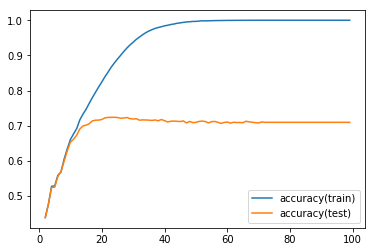

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history['max_depth'], history['accuracy(train)'], label='accuracy(train)')
plt.plot(history['max_depth'], history['accuracy(test)'], label='accuracy(test)')

plt.legend()

## min_samples_split

In [49]:
min_samples_split_list = list(range(2, 200))

history = []
for min_samples_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state =42)
    
    model.fit(X_train, y_train)

    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    train_score = accuracy_score(y_train, y_train_predict)
    test_score = accuracy_score(y_test, y_test_predict)
    
    history.append({
        'min_samples_split': min_samples_split,
        'accuracy(train)': train_score,
        'accuracy(test)' : test_score
    })
    
history = pd.DataFrame(history)
history.head()

,accuracy(test),accuracy(train),min_samples_split
0,0.709869,1.000000,2
1,0.713639,0.978829,3
2,0.711377,0.964238,4
3,0.711431,0.952833,5
4,0.712293,0.941751,6


In [50]:
history.tail()

,accuracy(test),accuracy(train),min_samples_split
193,0.715902,0.753036,195
194,0.716710,0.752667,196
195,0.716333,0.752366,197
196,0.716548,0.752205,198
197,0.716656,0.752020,199


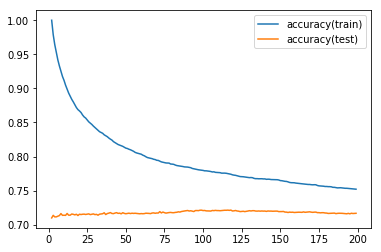

In [51]:
plt.plot(history['min_samples_split'], history['accuracy(train)'], label='accuracy(train)')
plt.plot(history['min_samples_split'], history['accuracy(test)'], label='accuracy(test)')

plt.legend()

### Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state =42)

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [53]:
train_score = accuracy_score(y_train, y_train_predict)
test_score = accuracy_score(y_test, y_test_predict)

print(f"Accuracy(train) = {train_score:.6f}")
print(f"Accuracy(test) = {test_score:.6f}")

Accuracy(train) = 0.993028
Accuracy(test) = 0.779412
